<a href="https://colab.research.google.com/github/kaggle-team/IEEE-Fraud-Detection/blob/master/categorical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Loading data from Google Drive'''

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pandas as pd
import numpy as np

# For graphs
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('ggplot')

In [0]:
#!unzip -q "/content/gdrive/My Drive/Kaggle/IEEE-Fraud-Detection.zip"
files_path = "/content/"
train_identity_path = os.path.join(files_path, 'train_identity.csv')
train_transaction_path = os.path.join(files_path, 'train_transaction.csv')
test_identity_path = os.path.join(files_path, 'test_identity.csv')
test_transaction_path = os.path.join(files_path, 'test_transaction.csv')

In [0]:
train_identity = pd.read_csv(train_identity_path)
train_transaction = pd.read_csv(train_transaction_path)

In [0]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
del train_identity, train_transaction

In [0]:
# Reduce memory by changing type of column without NaN
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings            
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()            
            
            if np.isfinite(df[col]).all(): 
                
              # test if column can be converted to an integer
              asint = df[col].fillna(0).astype(np.int64)
              result = (df[col] - asint)
              result = result.sum()
              if result > -0.01 and result < 0.01:
                  IsInt = True            
              # Make Integer/unsigned Integer datatypes
              if IsInt:
                  if mn >= 0:
                      if mx < 255:
                          df[col] = df[col].astype(np.uint8)
                      elif mx < 65535:
                          df[col] = df[col].astype(np.uint16)
                      elif mx < 4294967295:
                          df[col] = df[col].astype(np.uint32)
                      else:
                          df[col] = df[col].astype(np.uint64)
                  else:
                      if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                          df[col] = df[col].astype(np.int8)
                      elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                          df[col] = df[col].astype(np.int16)
                      elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                          df[col] = df[col].astype(np.int32)
                      elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                          df[col] = df[col].astype(np.int64)    
              # Make float datatypes 32 bit
              else:
                  df[col] = df[col].astype(np.float32)

    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")

    return df

In [9]:
train = reduce_mem_usage(train)

Memory usage of properties dataframe is : 1959.8762512207031  MB
Memory usage is:  1897.3629570007324  MB
This is  96.8103448275862 % of the initial size


In [0]:
categoricals = train.select_dtypes(include = 'object').columns.values.tolist()
len(categoricals)

In [0]:
#on considere NaN comme un label, pour voir si même les missing values peuvent avoir un intérêt
train[categoricals] = train[categoricals].fillna('NaN')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

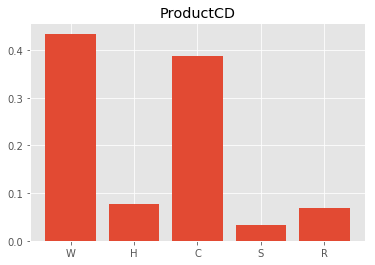

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

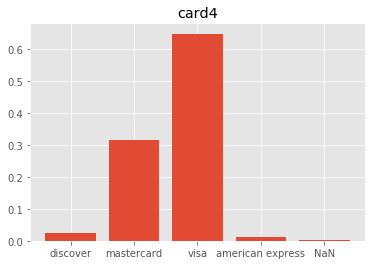

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

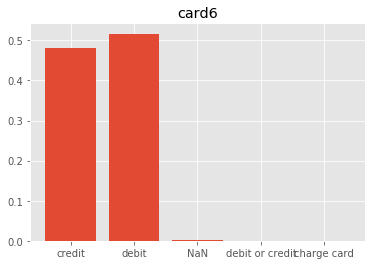

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

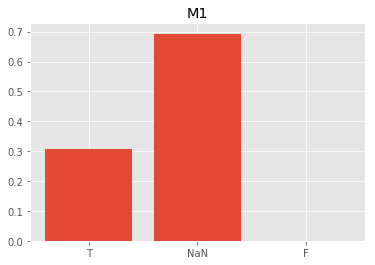

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

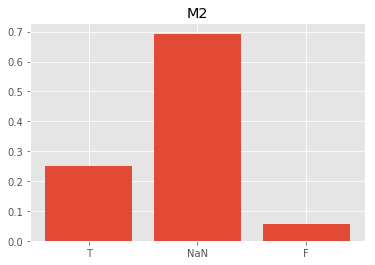

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

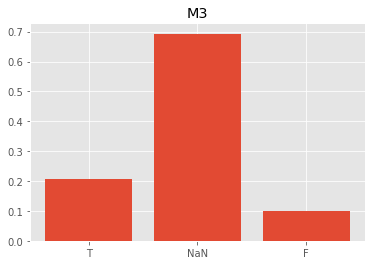

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

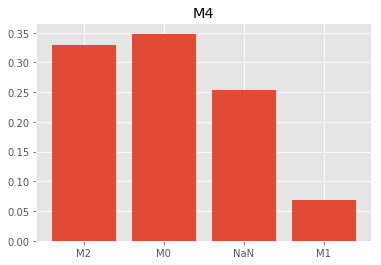

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

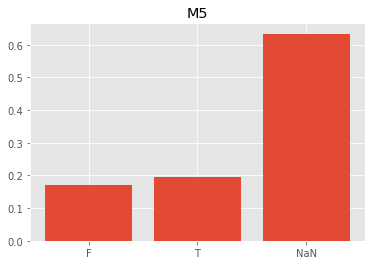

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

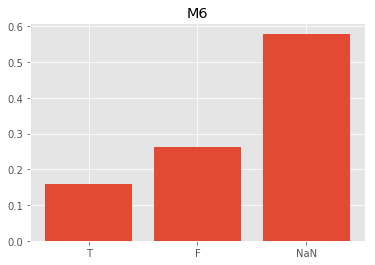

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

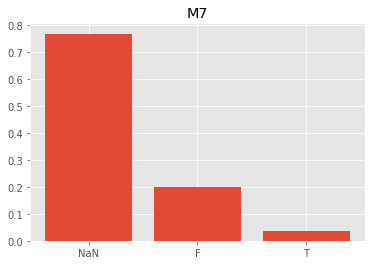

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

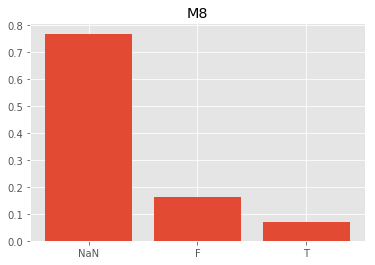

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

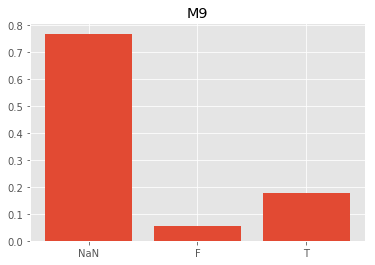

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

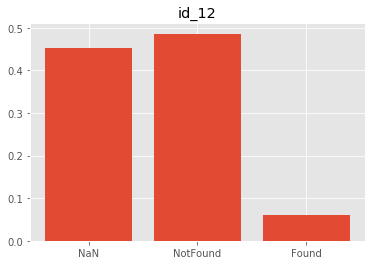

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

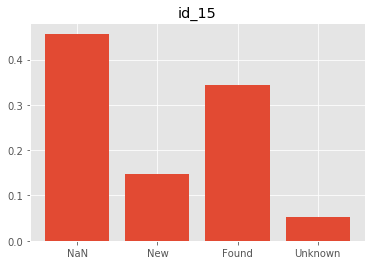

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

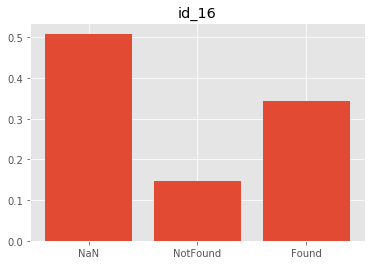

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

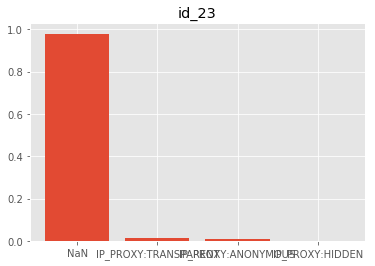

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

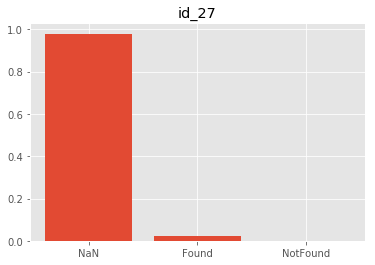

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

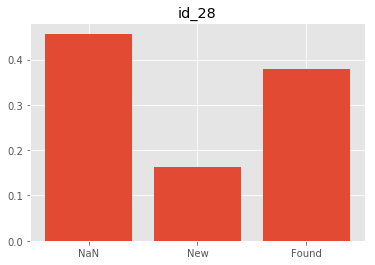

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

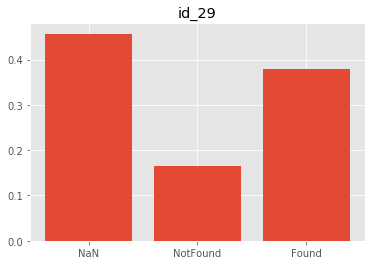

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

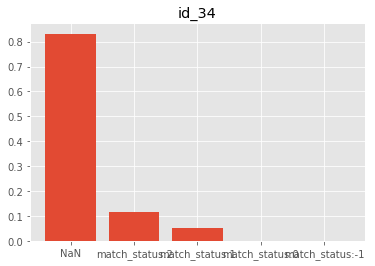

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

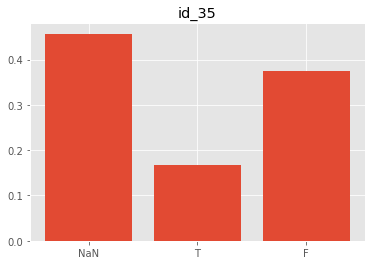

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

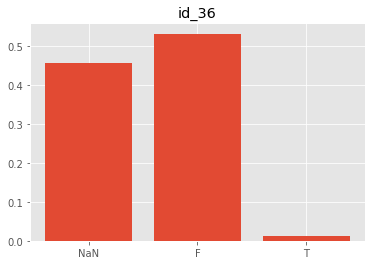

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

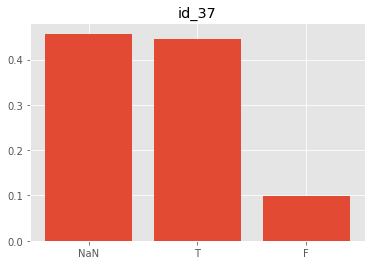

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

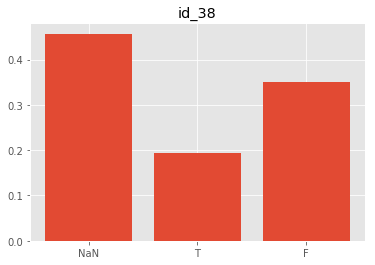

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

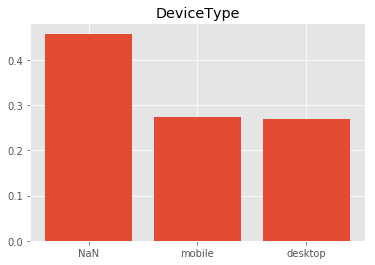

In [109]:
proportions = []
for col in train[categoricals].nunique()[train[categoricals].nunique() <6].keys():
  proportions = []
  for elt in train[col].unique():
    proportions.append(train[(train[col]==elt) & (train['isFraud'] == 1)].shape[0]/train[train['isFraud']==1].shape[0])
    fig = plt.figure()

  plt.bar(x= np.arange(len(proportions)), height = proportions, tick_label=train[col].unique().tolist())

  plt.title(col)
  plt.show() 

**Au vu des resultats on peut:**
- ProductCD: ajouter dummy "is in H,S,R"
- card4: ajouter dummy "is in discover, american xprs, NaN"
- card6: ajouter dummy "is in NaN, dbt or crdt, charge card"
- M1, M2,M3: ajouter dummy "is in discover, F" ou "is in T,F"

- Que veut dire M4?

- M5, M6,M7,M8,M9: dummy pour T et F?
  
- id_12: ajouter dummy "is in found"
- id_15: ajouter dummy "is in new, unknown"
- id_16: ajouter dummy "is in new, notfound"
- id_23, id_27, id_34: ajouter dummy "is NaN"
- id_28: ajouter dummy "is new"
- id_29: ajouter dummy "is notfound"
- id_35 id_36: ajouter dummy "is T"
- id_37: ajouter dummy "is F"
  

['a', 'W', 'H', 'C', 'S', 'R']